In [7]:
import os
from matplotlib import pyplot as plt
import numpy as np

In [16]:
stats_folder = "./stats"
stats_programs = os.listdir(stats_folder)
program_folders = [os.path.join(stats_folder, stats_program) for stats_program in stats_programs]

In [17]:
def get_matching_lines(filename, search_string):
    """
    Gets the lines in a file that contain the specified search string.

    Parameters:
    - filename: The path to the file to search.
    - search_string: The string to search for in the file.

    Returns:
    - A list of lines that contain the search string.
    """
    matching_lines = []

    try:
        with open(filename, 'r') as file:
            for line in file:
                if search_string in line:
                    matching_lines.append(line.rstrip())  # Remove trailing newline characters
    except FileNotFoundError:
        print(f"The file '{filename}' does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

    return matching_lines

def print_stats(stats_program: str, limit: int=1000):
    program_folder = os.path.join(stats_folder, stats_program)
    index = 0
    num_pages_accessed_last_epoch_list = []
    total_active_pages_list = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    while (True):
        stats_file_name = "stats-{}.out".format(index)
        stats_file_path = os.path.join(program_folder, stats_file_name)
        if os.path.exists(stats_file_path) and index != limit:
            num_pages_accessed_last_epoch = int(get_matching_lines(stats_file_path, "num_pages_accessed_last_epoch")[0].split()[2].split(".")[0])
            total_active_pages = int(get_matching_lines(stats_file_path, "total_active_pages")[0].split()[2].split(".")[0])
            
            num_pages_accessed_last_epoch_list.append(num_pages_accessed_last_epoch)
            total_active_pages_list.append(total_active_pages)
            index += 1
        else:
            print(stats_file_path, "Does not exist")
            break
    
    x = list(range(len(num_pages_accessed_last_epoch_list)))
    ax1.plot(x, num_pages_accessed_last_epoch_list, marker='', color="blue")
    ax1.set_title(stats_program)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('num_pages_accessed_last_epoch')
    # ax1.set_ylim(0, max(num_pages_accessed_last_epoch_list)+10)
    
    # ax2.plot(x, total_active_pages_list)
    
    ax2.plot(x, total_active_pages_list, marker='', color="orange")
    ax2.set_title(stats_program)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('total_active_pages')
    # ax2.set_ylim(0, max(total_active_pages_list)+10)
    
    print(np.mean(num_pages_accessed_last_epoch_list))
        
        

./stats/rbm_baseline/stats-0.out Does not exist
nan


/home/grads/t/tiendat.ng.cs/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/grads/t/tiendat.ng.cs/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


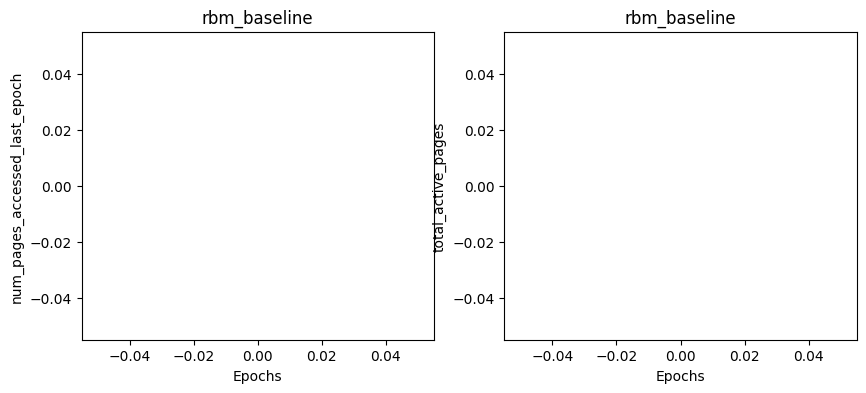

In [18]:
print_stats("rbm_baseline", 999999999999999999999999)

./stats/pagerank_baseline/stats-237.out Does not exist
4819.645569620253


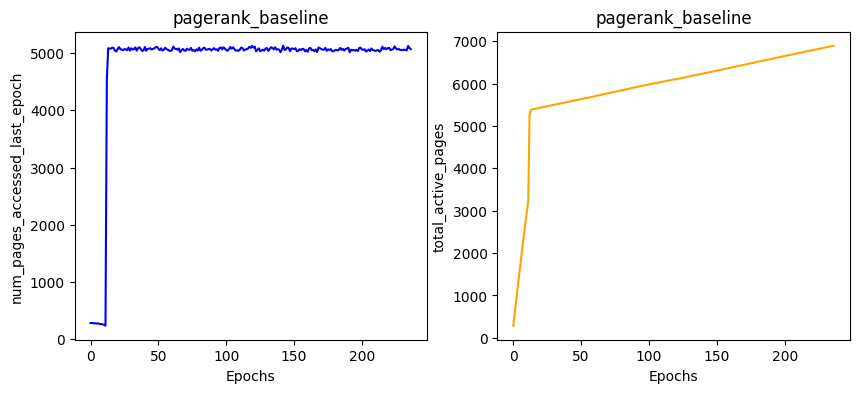

In [19]:
print_stats("pagerank_baseline", 999999999999999999999999)

./stats/lud_baseline/stats-2455.out Does not exist


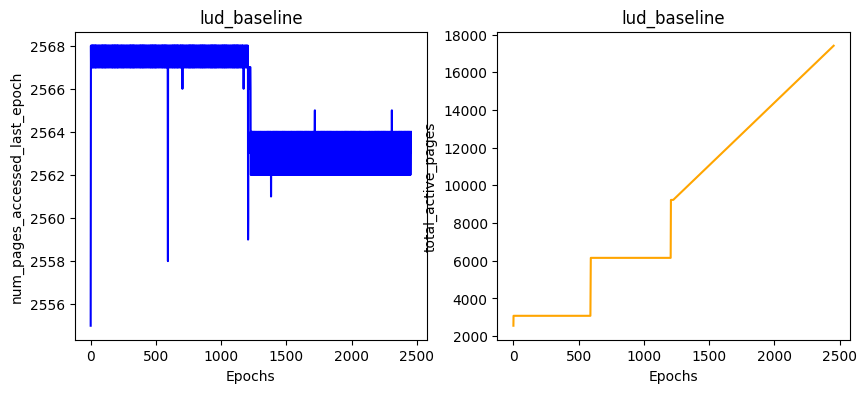

In [203]:
print_stats("lud_baseline", 999999999999999999999999)

./stats/spmv_baseline/stats-1967.out Does not exist


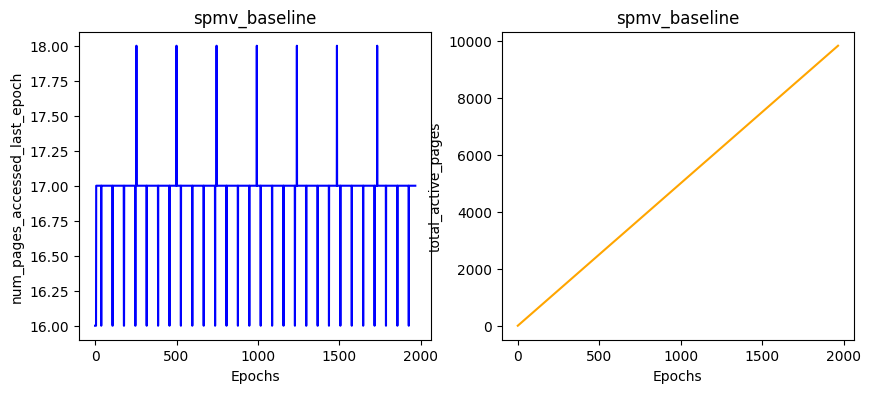

In [204]:
print_stats("spmv_baseline", 999999999999999999999999)

./stats/backprop_baseline/stats-13128.out Does not exist


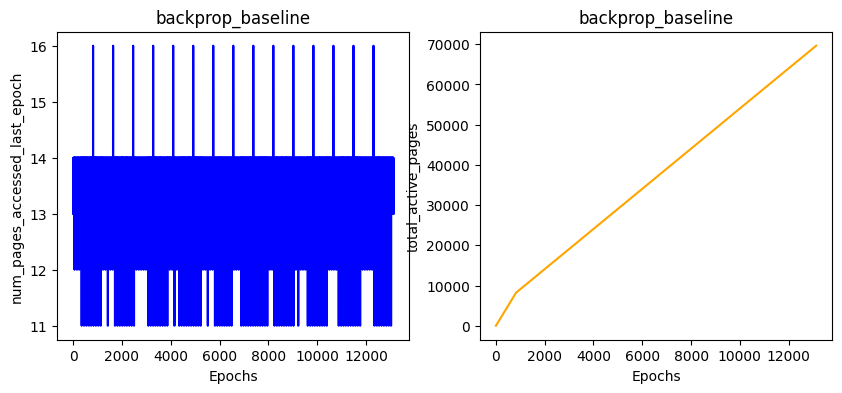

In [207]:
print_stats("backprop_baseline", 999999999999999999999999)

In [4]:
path="./stats/pagerank_baseline/active_pages_20-51-03-12-07-2024.csv"
import csv

y = []
x = []
with open(path, 'r') as csvfile:
    plots=csv.reader(csvfile, delimiter=',')
    for row in plots:
        #print(row)
        for e in row:
            if(e != ''):
                x.append(float(e))
#y = list(range(0, len(x)))
y.append(x)

In [5]:
print(y)

[[0.0, 30.0, 25.0, 24.0, 23.0, 21.0, 22.0, 21.0, 23.0, 22.0, 20.0, 22.0, 22.0, 23.0, 22.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 22.0, 22.0, 22.0, 23.0, 21.0, 23.0, 22.0, 23.0, 23.0, 21.0, 22.0, 21.0, 22.0, 21.0, 21.0, 21.0, 23.0, 22.0, 22.0, 24.0, 22.0, 21.0, 22.0, 21.0, 22.0, 23.0, 21.0, 22.0, 22.0, 22.0, 21.0, 21.0, 22.0, 23.0, 23.0, 22.0, 21.0, 20.0, 22.0, 23.0, 22.0, 22.0, 23.0, 21.0, 22.0, 22.0, 22.0, 21.0, 22.0, 20.0, 23.0, 21.0, 22.0, 22.0, 20.0, 23.0, 21.0, 20.0, 23.0, 22.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 23.0, 21.0, 21.0, 22.0, 22.0, 22.0, 21.0, 22.0, 22.0, 23.0, 21.0, 22.0, 21.0, 22.0, 21.0, 22.0, 20.0, 21.0, 21.0, 20.0, 22.0, 20.0, 21.0, 20.0, 21.0, 21.0, 21.0, 21.0, 19.0, 22.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 21.0, 21.0, 22.0, 22.0, 21.0, 19.0, 21.0, 21.0, 21.0, 21.0, 19.0, 22.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.0, 21.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 21.0, 21.0, 19.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 18.0, 18.

In [9]:
print(np.array(y).shape)

(1, 10000)


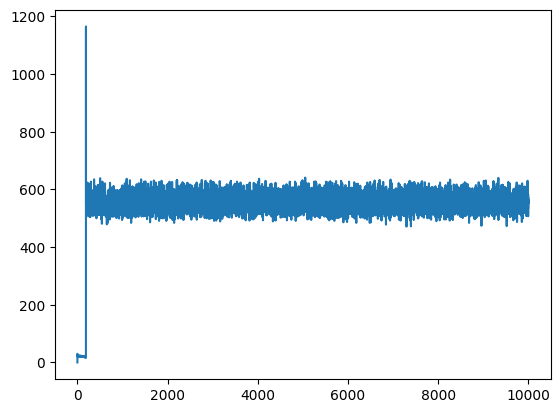

In [12]:
plt.plot(y[0])
plt.show()

This is the result of running with the trace reading bug fixed in the source code

## Last access count of each pages, recorded at each 100,000 cycles.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm import tqdm

In [66]:
def process_files(folder_path, limit):
    epochs = []
    page_buckets = [] # list of list of 8
    for index in tqdm(range(limit)):
        # divide to 8 buckets
        # 0: this epoch (e)
        # 2: e-1, e-2
        # 6: e-3 and e-6
        # 12: e-7 to e-12
        # 28: e-13 to e-28
        # 60: e-29 to e-60
        # 124: e-61 to e-124
        # e: e-125 to e-e
        [0, 2, 6, 12, 28, 60, 124]
        # return
        file_path = os.path.join(folder_path, "last_access-{}.pg".format(index))
        if os.path.exists(file_path):
            current_epoch = index # e
            entry = [0, 0, 0, 0, 0, 0, 0, 0]
            with open(file_path, 'r') as file:
                for line in file:
                    last_access = int(line.split(sep=",")[1])
                    diff = current_epoch - last_access
                    if diff == 0:
                        entry[0] += 1
                    elif diff <= 2:
                        entry[1] += 1
                    elif diff <= 6:
                        entry[2] += 1
                    elif diff <= 12:
                        entry[3] += 1
                    elif diff <= 28:
                        entry[4] += 1
                    elif diff <= 60:
                        entry[5] += 1
                    elif diff <= 124:
                        entry[6] += 1
                    else :
                        entry[7] += 1
            epochs.append(current_epoch)
            page_buckets.append(entry)
    return epochs, page_buckets
                        

In [67]:
epochs, page_buckets = process_files("./stats/pagerank_baseline", 99999)
epochs = np.array(epochs)
page_buckets = np.array(page_buckets)

100%|██████████| 99999/99999 [00:01<00:00, 98679.25it/s] 


In [68]:
page_buckets_percentage = page_buckets / page_buckets.sum(axis=1, keepdims=True)


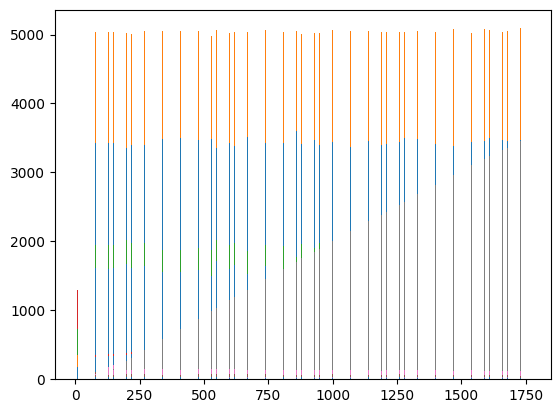

In [69]:
for i in range (8):
    if i == 0:
        plt.bar(epochs, page_buckets[:, 0])
    else:
        
        plt.bar(epochs, page_buckets[:, i], bottom=page_buckets[:, i-1])

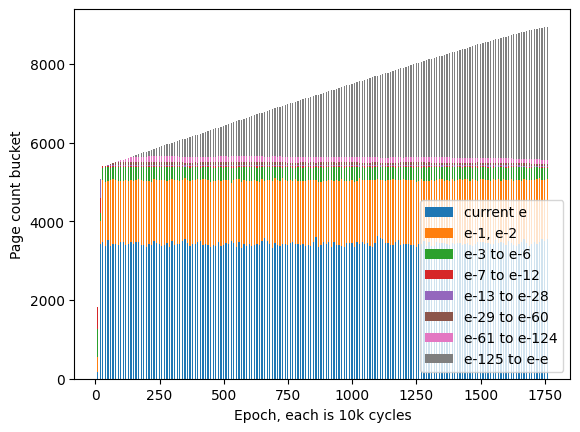

In [70]:
labels = [
    "current e",
    "e-1, e-2",
    "e-3 to e-6",
    "e-7 to e-12",
    "e-13 to e-28",
    "e-29 to e-60",
    "e-61 to e-124",
    "e-125 to e-e",
]

bottom = 0
for i in range(8):
    y = page_buckets[:, i]
    plt.bar(epochs, y, width=5, bottom=bottom, label= labels[i])
    if i == 0:
        bottom = y
    else:
        bottom = bottom + page_buckets[:, i]

plt.ylabel("Page count bucket")
plt.xlabel("Epoch, each is 10k cycles")
plt.legend()
plt.show()

In [121]:
import seaborn as sns
palette = sns.color_palette("Spectral", 8)

def plot_page_access_bucket_percentage(page_buckets_percentage, epochs, save_filename):
    labels = [
        "current e",
        "e-1, e-2",
        "e-3 to e-6",
        "e-7 to e-12",
        "e-13 to e-28",
        "e-29 to e-60",
        "e-61 to e-124",
        "e-125 to e-e",
    ]

    bottom = 0
    for i in range(8):
        y = page_buckets_percentage[:, i]
        plt.bar(epochs, y, width=10, bottom=bottom, label= labels[i], color=palette[i], edgecolor=palette[i])
        if i == 0:
            bottom = y
        else:
            bottom = bottom + page_buckets_percentage[:, i]

    # plt.ylabel("Page percentages")
    # plt.xlabel("Epoch, each is 10k cycles")
    # plt.legend()
    plt.xlim(0, max(epochs))
    plt.savefig(save_filename, bbox_inches="tight", format="pdf")
    plt.show()

In [77]:
epochs

array([   9,   19,   29,   39,   49,   59,   69,   79,   89,   99,  109,
        119,  129,  139,  149,  159,  169,  179,  189,  199,  209,  219,
        229,  239,  249,  259,  269,  279,  289,  299,  309,  319,  329,
        339,  349,  359,  369,  379,  389,  399,  409,  419,  429,  439,
        449,  459,  469,  479,  489,  499,  509,  519,  529,  539,  549,
        559,  569,  579,  589,  599,  609,  619,  629,  639,  649,  659,
        669,  679,  689,  699,  709,  719,  729,  739,  749,  759,  769,
        779,  789,  799,  809,  819,  829,  839,  849,  859,  869,  879,
        889,  899,  909,  919,  929,  939,  949,  959,  969,  979,  989,
        999, 1009, 1019, 1029, 1039, 1049, 1059, 1069, 1079, 1089, 1099,
       1109, 1119, 1129, 1139, 1149, 1159, 1169, 1179, 1189, 1199, 1209,
       1219, 1229, 1239, 1249, 1259, 1269, 1279, 1289, 1299, 1309, 1319,
       1329, 1339, 1349, 1359, 1369, 1379, 1389, 1399, 1409, 1419, 1429,
       1439, 1449, 1459, 1469, 1479, 1489, 1499, 15

In [96]:
pr_epochs, pr_page_buckets = process_files("./stats/pagerank_baseline", 99999)
bp_epochs, bp_page_buckets = process_files("./stats/backprop_baseline", 99999)
lud_epochs, lud_page_buckets = process_files("./stats/lud_baseline", 99999)
rbm_epochs, rbm_page_buckets = process_files("./stats/rbm_baseline", 99999)
spmv_epochs, spmv_page_buckets = process_files("./stats/spmv_baseline", 99999)
sgemm_epochs, sgemm_page_buckets = process_files("./stats/sgemm_baseline", 99999)

100%|██████████| 99999/99999 [00:00<00:00, 288471.82it/s]


In [99]:
pr_page_buckets = np.array(pr_page_buckets)
bp_page_buckets = np.array(bp_page_buckets)
lud_page_buckets = np.array(lud_page_buckets)
rbm_page_buckets = np.array(rbm_page_buckets)
spmv_page_buckets = np.array(spmv_page_buckets)
sgemm_page_buckets = np.array(sgemm_page_buckets)

In [102]:
pr_page_buckets_percentage = pr_page_buckets / pr_page_buckets.sum(axis=1, keepdims=True)
bp_page_buckets_percentage = bp_page_buckets / bp_page_buckets.sum(axis=1, keepdims=True)
lud_page_buckets_percentage = lud_page_buckets / lud_page_buckets.sum(axis=1, keepdims=True)
rbm_page_buckets_percentage = rbm_page_buckets / rbm_page_buckets.sum(axis=1, keepdims=True)
spmv_page_buckets_percentage = spmv_page_buckets / spmv_page_buckets.sum(axis=1, keepdims=True)
# sgemm_page_buckets_percentage = sgemm_page_buckets / sgemm_page_buckets.sum(axis=1, keepdims=True)

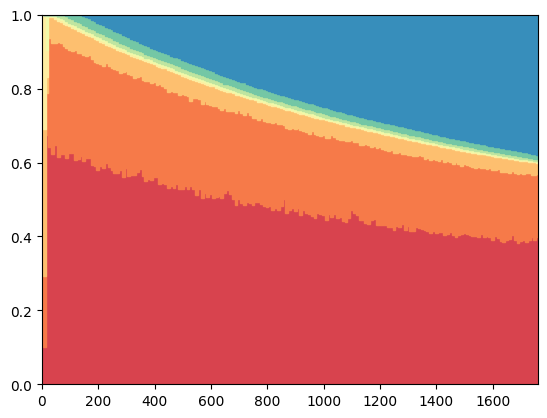

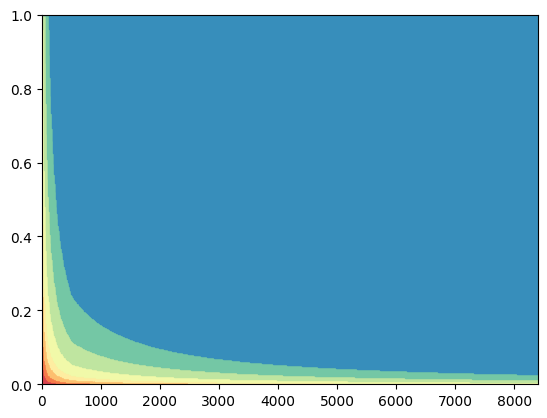

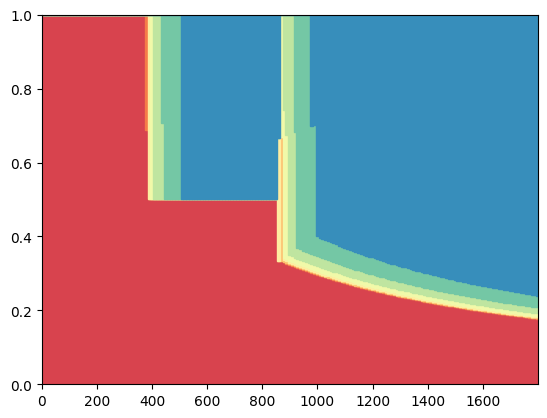

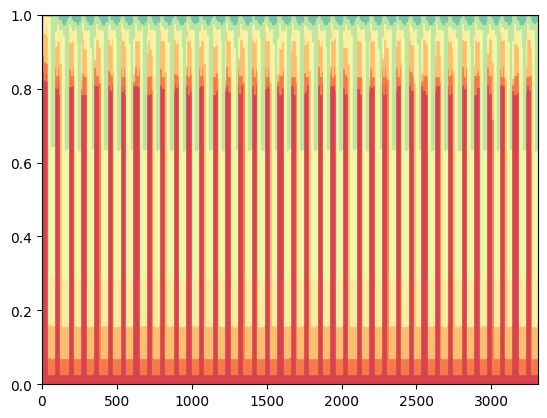

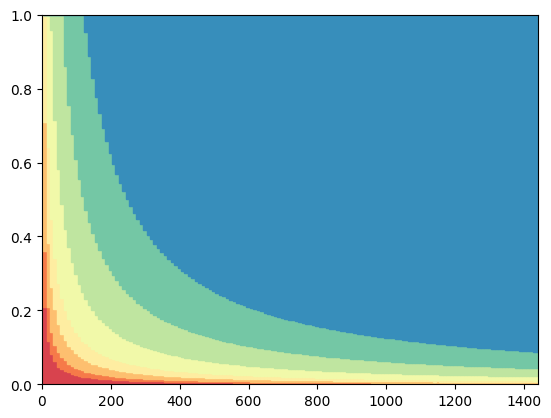

In [122]:
plot_page_access_bucket_percentage(pr_page_buckets_percentage, pr_epochs, "pr_page_percentage.pdf")
plot_page_access_bucket_percentage(bp_page_buckets_percentage, bp_epochs, "bp_page_percentage.pdf")
plot_page_access_bucket_percentage(lud_page_buckets_percentage, lud_epochs, "lud_page_percentage.pdf")
plot_page_access_bucket_percentage(rbm_page_buckets_percentage, rbm_epochs, "rbm_page_percentage.pdf")
plot_page_access_bucket_percentage(spmv_page_buckets_percentage, spmv_epochs, "spmv_page_percentage.pdf")

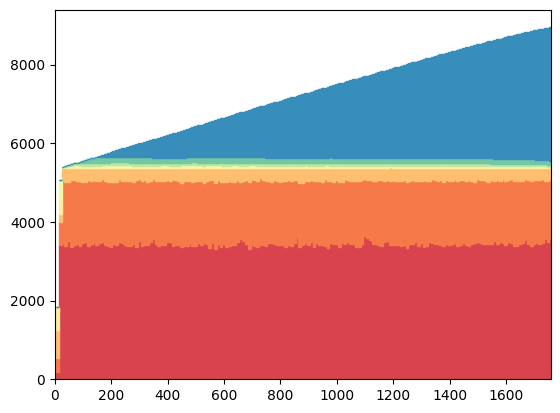

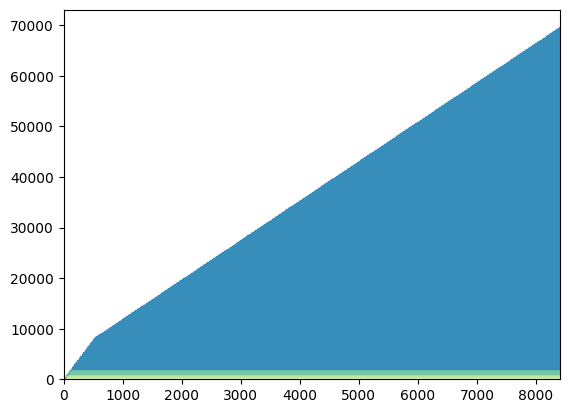

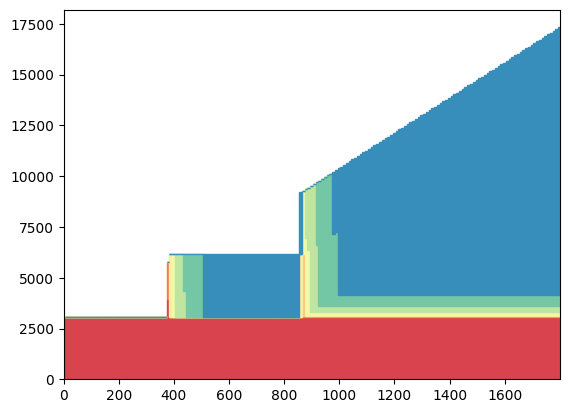

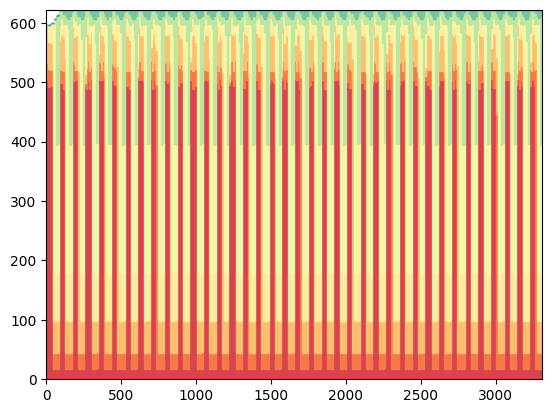

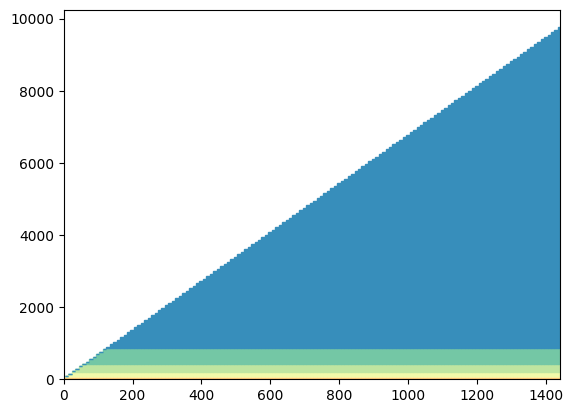

In [123]:
plot_page_access_bucket_percentage(pr_page_buckets, pr_epochs, "pr_page_count.pdf")
plot_page_access_bucket_percentage(bp_page_buckets, bp_epochs, "bp_page_count.pdf")
plot_page_access_bucket_percentage(lud_page_buckets, lud_epochs, "lud_page_count.pdf")
plot_page_access_bucket_percentage(rbm_page_buckets, rbm_epochs, "rbm_page_count.pdf")
plot_page_access_bucket_percentage(spmv_page_buckets, spmv_epochs, "spmv_page_count.pdf")

In [120]:
palette.as_hex()

['#d8434e',
 '#f67a49',
 '#fdbf6f',
 '#feeda1',
 '#f1f9a9',
 '#bfe5a0',
 '#74c7a5',
 '#378ebb']